In [1]:
import pandas as pd
from matplotlib.pyplot import *
%matplotlib inline

In [54]:
df = pd.read_csv('Arr.csv', parse_dates=[['Date','Time']])
df.head()

,Date_Time,SentenceNo,SequenceNo,Speaker,Text
0,2016-02-29 15:26:00,0,1,Arrchana,Yo divs
1,2016-02-29 15:26:00,1,2,Arrchana,Meeting over ah?
2,2016-02-29 15:26:00,2,3,Arrchana,I am going to library in a bit
3,2016-02-29 15:26:00,3,4,Arrchana,Wanna get tea?
4,2016-02-29 17:18:00,4,5,div,Hey


In [55]:
df = df[~df['Speaker'].isin(['Rubini','MESSAGE'])] 
df = df.dropna()

In [56]:
dates = pd.to_datetime(df['Date_Time'])
df['day-of-week'] = dates.dt.weekday_name
df.head()

,Date_Time,SentenceNo,SequenceNo,Speaker,Text,day-of-week
0,2016-02-29 15:26:00,0,1,Arrchana,Yo divs,Monday
1,2016-02-29 15:26:00,1,2,Arrchana,Meeting over ah?,Monday
2,2016-02-29 15:26:00,2,3,Arrchana,I am going to library in a bit,Monday
3,2016-02-29 15:26:00,3,4,Arrchana,Wanna get tea?,Monday
4,2016-02-29 17:18:00,4,5,div,Hey,Monday


In [57]:
dates = pd.to_datetime(df['Date_Time'])
df['month'] = dates.dt.strftime('%b')
df['year'] = dates.dt.year
df.head()

,Date_Time,SentenceNo,SequenceNo,Speaker,Text,day-of-week,month,year
0,2016-02-29 15:26:00,0,1,Arrchana,Yo divs,Monday,Feb,2016
1,2016-02-29 15:26:00,1,2,Arrchana,Meeting over ah?,Monday,Feb,2016
2,2016-02-29 15:26:00,2,3,Arrchana,I am going to library in a bit,Monday,Feb,2016
3,2016-02-29 15:26:00,3,4,Arrchana,Wanna get tea?,Monday,Feb,2016
4,2016-02-29 17:18:00,4,5,div,Hey,Monday,Feb,2016


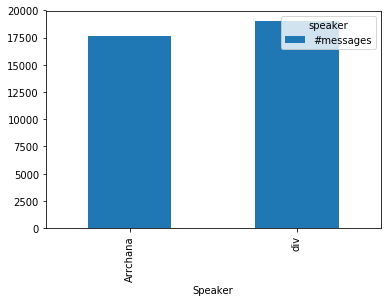

In [58]:
bySpeaker = pd.crosstab(index = df['Speaker'], columns ='#messages',colnames=['speaker'])
bySpeaker.plot.bar()

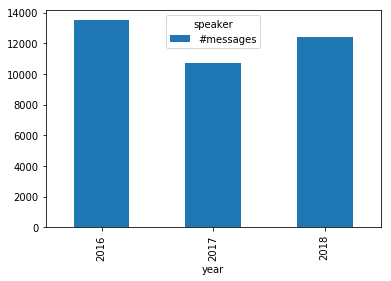

In [59]:
byyear = pd.crosstab(index = df['year'], columns ='#messages',colnames=['speaker'])
byyear.plot.bar()

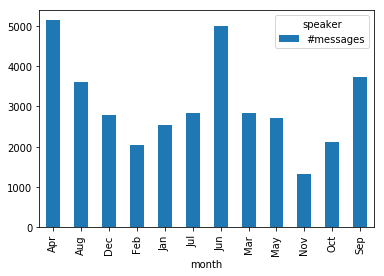

In [60]:
byMonth = pd.crosstab(index = df['month'], columns ='#messages',colnames=['speaker'])
byMonth.plot.bar()

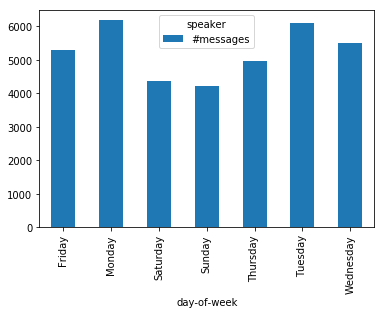

In [61]:
byWkday = pd.crosstab(index = df['day-of-week'], columns ='#messages',colnames=['speaker'])
byWkday.plot.bar()

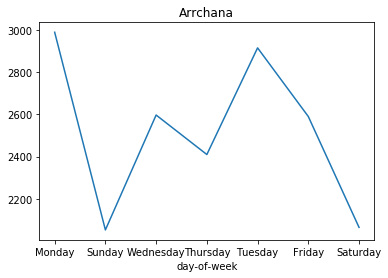

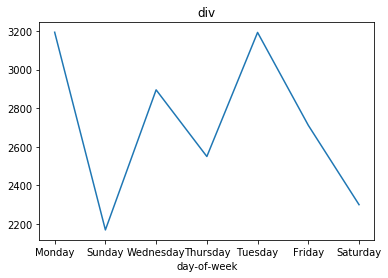

In [62]:
groups = df.groupby(['Speaker','day-of-week'],sort=False)['Text'].count()
for i,s in enumerate(df['Speaker'].unique()):
    matplotlib.pyplot.figure()
    groups[s].plot(title=s)
    

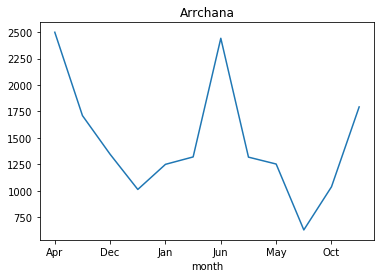

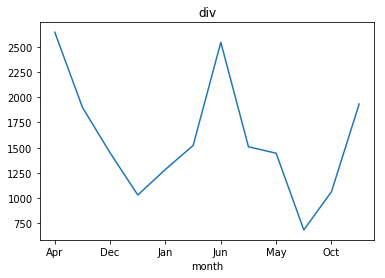

In [63]:
groups = df.groupby(['Speaker','month'])['Text'].count()
for i,s in enumerate(df['Speaker'].unique()):
    matplotlib.pyplot.figure()
    groups[s].plot(title=s)
    

In [64]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\div_1\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [65]:
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.corpus import stopwords

stopWords = set(stopwords.words('english'))
stopWords

{'a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 'her',
 'here',
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 'i',
 'if',
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it's",
 'its',
 'itself',
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'needn',
 "needn't",
 'no',
 'nor',
 'not',
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'only',
 'or',
 'other',
 'our',
 'ours',
 'ourselves',
 'out',
 'over',
 'own',
 'r

In [66]:
text = df['Text']
tokenized = []
for t in text:
    t = t.lower()
    words = t.split(' ')
    #words = word_tokenize(t)
    print(words)
    words = [w for w in words if w not in stopWords]
    print(words)
    tokenized.append((';').join(words))

['yo', 'divs']
['yo', 'divs']
['meeting', 'over', 'ah?']
['meeting', 'ah?']
['i', 'am', 'going', 'to', 'library', 'in', 'a', 'bit']
['going', 'library', 'bit']
['wanna', 'get', 'tea?']
['wanna', 'get', 'tea?']
['hey']
['hey']
['sorry', 'still', 'here', ':(']
['sorry', 'still', ':(']
['no', 'problem']
['problem']
['will', 'be', 'getting', 'dinner', 'at', 'salad', 'stop']
['getting', 'dinner', 'salad', 'stop']
['will', 'u', 'be', 'having', 'here', 'or', 'going', 'home', 'for', 'dinner?']
['u', 'going', 'home', 'dinner?']
['let', 'me', 'know', 'if', 'u', 'want']
['let', 'know', 'u', 'want']
['i', 'll', 'be', 'done', 'here', 'at', '7:30']
['done', '7:30']
['hey!', 'you', 'go', 'ahead', 'babe']
['hey!', 'go', 'ahead', 'babe']
['im', 'not', 'sure', 'if', 'ill', 'be', 'on', 'camous', 'tonugjt']
['im', 'sure', 'ill', 'camous', 'tonugjt']
['okays']
['okays']
['how', 'was', 'meeting?']
['meeting?']
['long']
['long']
['but', 'atleast', 'got', 'something', 'done']
['atleast', 'got', 'something', '

['hmm']
['hmm']
["how's", 'it', 'going']
["how's", 'going']
['clarity', 'in?']
['clarity', 'in?']
['topic/prof', 'search']
['topic/prof', 'search']
['not', 'that', 'confused', 'now']
['confused']
['wwent', 'and', 'spoke', 'to', 'soc', 'facilitator']
['wwent', 'spoke', 'soc', 'facilitator']
['and', 'had', 'a', '2', 'hour', 'lunch', 'with', 'trp']
['2', 'hour', 'lunch', 'trp']
['and', 'now', 'inians', 'friebd', 'ehos', 'doing', 'a', 'phd', 'gave', 'me', 'pretty', 'much', 'the', 'same', 'advice', 'you', 'all', 'have', 'been', 'for', 'a', 'while']
['inians', 'friebd', 'ehos', 'phd', 'gave', 'pretty', 'much', 'advice']
['but', "i'm", 'finally', 'seeing', 'light', 'and', 'some', 'clarity', 'as', 'to', 'actionavle', 'and', 'decision', 'times']
["i'm", 'finally', 'seeing', 'light', 'clarity', 'actionavle', 'decision', 'times']
['items*']
['items*']
['cool']
['cool']
['u', 'will', 'become', 'clearer', 'soon']
['u', 'become', 'clearer', 'soon']
[':)']
[':)']
['down', 'to', '6', 'profs', 'now']
[

["i'm", 'not', 'in', 'campus', 'today']
["i'm", 'campus', 'today']
['missed', 'the', 'lecture']
['missed', 'lecture']
['ohh']
['ohh']
['why', 'lah', 'skipped', 'lecture?']
['lah', 'skipped', 'lecture?']
['worked', 'late', 'last', 'night']
['worked', 'late', 'last', 'night']
['oh', 'seri']
['oh', 'seri']
['try', 'not', 'to', 'miss', 'towards', 'the', 'end']
['try', 'miss', 'towards', 'end']
['these', 'are', 'still', 'project', 'presentations']
['still', 'project', 'presentations']
["won't", 'be', 'missing', 'if', 'the', 'paper', 'seemed', 'interesting']
['missing', 'paper', 'seemed', 'interesting']
['read', 'this', 'weeks', 'papers']
['read', 'weeks', 'papers']
['already']
['already']
['oh', 'seri']
['oh', 'seri']
['but', 'u', 'll', 'have', 'class', 'participation', 'marks', 'la?']
['u', 'class', 'participation', 'marks', 'la?']
['nope']
['nope']
['i', 'go', 'for', 'every', 'lesson.', 'just', 'missed', 'todsy']
['go', 'every', 'lesson.', 'missed', 'todsy']
['oh', 'we', 'had', 'that', 'f

["he's", 'monimizing', 'problems', 'faced', 'real', 'world', 'saying', "that's", 'easy']
['yeah', 'headed', 'home', 'now']
['yeah', 'headed', 'home']
['lol', 'yeah', 'right']
['lol', 'yeah', 'right']
['sarcastic', 'one', 'or', 'genuine?']
['sarcastic', 'one', 'genuine?']
['lol']
['lol']
['of', 'course', 'sarcastic', 'lah']
['course', 'sarcastic', 'lah']
['real', 'world', 'problems', 'are', 'way', 'more', 'difficult', 'than', 'we', 'imagine']
['real', 'world', 'problems', 'way', 'difficult', 'imagine']
['yes..and', 'he', 'assumed', 'that', 'systems', 'like', 'maintain', 'clocks', 'across', 'different', 'systems', 'is', 'incredibly', 'easy', 'to', 'the', 'microsecond.', 'when', 'other', 'authors', 'say', 'it', 'is', 'not']
['yes..and', 'assumed', 'systems', 'like', 'maintain', 'clocks', 'across', 'different', 'systems', 'incredibly', 'easy', 'microsecond.', 'authors', 'say']
['and', 'we', "couldn't", 'defend', 'their', 'position.', 'he', 'just', 'kept', 'saying', 'my', 'phone', 'is', 'at

['u', 'want', 'get', 'things', 'done', 'quick', 'u', 'want', 'customize', 'lot,', 'go', 'lyx']
["it's", 'almost', 'wysiwyg']
['almost', 'wysiwyg']
['but', 'output', 'is', 'latex']
['output', 'latex']
['cool']
['cool']
['i', 'got', 'familiarized', 'with', 'latex', 'using', 'lyx']
['got', 'familiarized', 'latex', 'using', 'lyx']
['my', 'output', 'can', 'be', 'pdf', 'i', 'think']
['output', 'pdf', 'think']
['then', 'went', 'on', 'to', 'use', 'texmaker']
['went', 'use', 'texmaker']
['yeah', 'yeah', 'pdf']
['yeah', 'yeah', 'pdf']
['or', "that's", 'what', 'it', 'finally', 'should', 'be']
["that's", 'finally']
['i', 'meant', 'latex', 'output', 'meaning,', 'lyx->', 'latex', 'in', 'the', 'backend->', 'pdf', 'file', 'output']
['meant', 'latex', 'output', 'meaning,', 'lyx->', 'latex', 'backend->', 'pdf', 'file', 'output']
['so', 'type', 'setting', 'is', 'achieved', 'superbly']
['type', 'setting', 'achieved', 'superbly']
['haha', 'ok!', 'thanks']
['haha', 'ok!', 'thanks']
['will', 'check', 'it', '

['after', 'i', 'installed', 'it']
['installed']
['may', 'be', "that's", 'why', 'it', 'was', 'visible', 'for', 'me']
['may', "that's", 'visible']
['probably']
['probably']
['https://datapyr.zeef.com/kranthi.kumar']
['https://datapyr.zeef.com/kranthi.kumar']
['hi', 'chans']
['hi', 'chans']
['yo', 'divs']
['yo', 'divs']
['hi', 'arr', ':(']
['hi', 'arr', ':(']
['i', 'just', 'showered', 'n', 'all']
['showered', 'n']
['wondering', 'if', "there's", 'any', 'point', 'in', 'coming', 'now..', 'will', 'be', 'easily', '12', ':(']
['wondering', "there's", 'point', 'coming', 'now..', 'easily', '12', ':(']
['hmmm']
['hmmm']
["didn't", 'expect', 'to', 'sleep', 'so', 'late..', 'been', 'waking', 'up', 'early']
['expect', 'sleep', 'late..', 'waking', 'early']
['the', 'organizer', 'just', 'replied', 'to', 'me..', 'saying', 'max', '25', 'people', 'so', '2', 'facilitators', 'should', 'be', 'okay,', 'but', 'if', 'your', 'friend', 'wants', 'to', 'come', 'she', 'can', 'come', 'anytime', 'from', '11-1']
['organi

['yeah', 'just', 'going', 'to', 'utown']
['yeah', 'going', 'utown']
['yay..', 'see', 'you', 'at', 'koufu?']
['yay..', 'see', 'koufu?']
['this', 'guy', 'seems', 'to', 'be', 'understanding']
['guy', 'seems', 'understanding']
['yeah']
['yeah']
['sure']
['sure']
["i'm", 'thinking', 'the', 'same', 'thing']
["i'm", 'thinking', 'thing']
['terrence', 'sim', 'name', 'is', 'familiar']
['terrence', 'sim', 'name', 'familiar']
['apdiya']
['apdiya']
['yaaru?']
['yaaru?']
['(know', 'someone', 'who', 'worked', 'under', 'him', 'ah)']
['(know', 'someone', 'worked', 'ah)']
['therila']
['therila']
['will', 'read', 'profile', 'to', 'place', 'him']
['read', 'profile', 'place']
['haha', 'seri']
['haha', 'seri']
["i'm", 'sitting', 'at', 'koufu']
["i'm", 'sitting', 'koufu']
['good', 'that', 'you', 'have', 'settled', 'a', 'few', 'things', 'divs']
['good', 'settled', 'things', 'divs']
['get', 'cracking', 'now']
['get', 'cracking']
[':)']
[':)']
["i'm", 'also', 'quite', 'relieved', 'mentally']
["i'm", 'also', 'qu

['oh', '1', 'week', 'notice']
['oh', '1', 'week', 'notice']
['yeab']
['yeab']
["that's", 'actually', 'a', 'good', 'strategy']
["that's", 'actually', 'good', 'strategy']
['3', 'months', 'over', 'all..']
['3', 'months', 'all..']
['atleast', 'ill', 'have', 'some', 'income']
['atleast', 'ill', 'income']
['since', 'its', 'holidays', 'i', 'only', 'have', 'thesis', 'work.', 'no', 'courses..mm']
['since', 'holidays', 'thesis', 'work.', 'courses..mm']
['but', 'has', 'its', 'problems', 'also..', 'how', 'will', 'u', 'manage', 'masters', 'research,', 'part', 'time', 'job', 'and', 'job', 'search?']
['problems', 'also..', 'u', 'manage', 'masters', 'research,', 'part', 'time', 'job', 'job', 'search?']
['dont', 'know..', 'have', 'to..']
['dont', 'know..', 'to..']
['if', 'u', 'can', 'do', 'this,', 'then', 'okay']
['u', 'this,', 'okay']
['ill', 'wait', 'and', 'see', 'what', 'she', 'says..']
['ill', 'wait', 'see', 'says..']
['yup']
['yup']
['super', 'early', 'lunch', 'today']
['super', 'early', 'lunch', 

['u', 'days,', 'gets', 'set..', 'groggy', '11/12', 'night', 'days']
['hmm']
['hmm']
['i', 'reach', 'home', 'by', '10', '11']
['reach', 'home', '10', '11']
['so', 'i', 'end', 'up', 'stsying', 'up', 'till', '12']
['end', 'stsying', 'till', '12']
['or', '1']
['1']
['i', 'guess', 'i', 'should', 'start', 'leacibg', 'earlier']
['guess', 'start', 'leacibg', 'earlier']
['yeahh']
['yeahh']
['why', 'do', 'u', 'reach', 'home', 'so', 'late?']
['u', 'reach', 'home', 'late?']
["don't", 'tell', 'me', 'u', 'r', 'in', 'lab', 'till', 'then']
['tell', 'u', 'r', 'lab', 'till']
['usually', 'yes']
['usually', 'yes']
['i', 'keep', 'my', 'lunch', 'for', 'dinner']
['keep', 'lunch', 'dinner']
['i', 'end', 'up', 'being', 'more', 'productive', 'towards', '6/7']
['end', 'productive', 'towards', '6/7']
['when', 'the', 'lab', 'is', 'really', 'silent']
['lab', 'really', 'silent']
['and', 'travel', 'tme', 'is', 'also', 'better', 'if', 'i', 'leave', 'at8', '3p']
['travel', 'tme', 'also', 'better', 'leave', 'at8', '3p']

['yeah', '😱']
['yeah', '😱']
['haha']
['haha']
['but', 'the', 'sound', 'was', 'amazing', 'no']
['sound', 'amazing']
['when', 'u', 'played']
['u', 'played']
['yup']
['yup']
['lunch', 'at', 'deck?']
['lunch', 'deck?']
['12', '15?']
['12', '15?']
['had', 'quite', 'a', 'late', 'breakfast', 'diva']
['quite', 'late', 'breakfast', 'diva']
['divs']
['divs']
["don't", 'think', 'i', 'can', 'eat', 'by', 'then']
['think', 'eat']
['oh', 'okies']
['oh', 'okies']
['past', '3', 'days', 'have', 'been', 'sleeping', 'super', 'late', 'and', 'waking', 'up', 'late']
['past', '3', 'days', 'sleeping', 'super', 'late', 'waking', 'late']
['need', 'to', 'change', 'that']
['need', 'change']
['hmm']
['hmm']
['me', 'toos']
['toos']
['but', 'been', 'wakong', 'up', 'at', '8', 'sharp']
['wakong', '8', 'sharp']
['end', 'up', 'sleeping', 'during', 'the', 'day', '😒']
['end', 'sleeping', 'day', '😒']
['ahh']
['ahh']
["that's", 'not', 'okay']
["that's", 'okay']
['will', 'bring', 'it', 'around']
['bring', 'around']
['yeah']
[

['think', 'of', 'area', 'of', 'parallelogram', 'for', 'instance']
['think', 'area', 'parallelogram', 'instance']
['look', 'up', 'how', 'to', 'calculate', 'the', 'volume', 'for', 'a', 'parellopiped']
['look', 'calculate', 'volume', 'parellopiped']
['the', 'sides', 'are', 'parallel']
['sides', 'parallel']
['but', 'area', 'is', 'not', 'product', 'of', 'sides', 'like', 'a', 'rectangle']
['area', 'product', 'sides', 'like', 'rectangle']
['cos', 'the', 'height', 'is', 'not', 'a', 'side', 'in', 'parallelogram']
['cos', 'height', 'side', 'parallelogram']
['if', 'you', 'had', 'a', 'parallelepiped...then', 'the', 'triangles', 'height', 'will', 'be', 'on', 'the', 'surface', 'of', 'the', 'parallelepiped']
['parallelepiped...then', 'triangles', 'height', 'surface', 'parallelepiped']
['the', 'triangles', 'are', 'parallel,', 'remember?']
['triangles', 'parallel,', 'remember?']
['what', 'is', 'volume', 'really?', 'no', 'matter', 'what', 'angle,', 'as', 'long', 'as', 'both', 'triangles', 'are', 'parall

['btw', 'go', 'botanic', 'gardens', 'get', 'home?', 'taking', '151', 'king', 'albert', 'park', 'taking', 'downtown', 'line', 'would', 'much', 'shorter', 'no?']
['no', 'went', 'to', 'bv', 'to', 'get', 'something', 'lol']
['went', 'bv', 'get', 'something', 'lol']
['vaish', 'also', 'had', 'messaged..', 'cool', 'man']
['vaish', 'also', 'messaged..', 'cool', 'man']
['5%', 'enna', 'velai?', 'lol']
['5%', 'enna', 'velai?', 'lol']
['and', 'tmrw', 'if', 'we', 'meet', 'for', 'lunchos']
['tmrw', 'meet', 'lunchos']
['illa', 'in', 'case', 'something', 'comes', 'up']
['illa', 'case', 'something', 'comes']
['tmrw', 'is', 'my', 'ta', 'stand', 'by', 'day']
['tmrw', 'ta', 'stand', 'day']
['ohh', 'what', 'is', 'that']
['ohh']
['in', 'case', 'many', 'students', 'come', 'for', 'a', 'session,', 'i', 'may', 'have', 'to', 'take', 'class', 'too']
['case', 'many', 'students', 'come', 'session,', 'may', 'take', 'class']
['ohh']
['ohh']
['ok', 'ok']
['ok', 'ok']
['from', '6-8']
['6-8']
['consulting', 'session', '

['sigh', 'keep', 'forgetting']
['is', 'okaays']
['okaays']
['lot', 'of', 'work', 'today', 'ah?']
['lot', 'work', 'today', 'ah?']
['yeah', 'have', 'some', 'stuff', 'all', 'evening/night', 'also']
['yeah', 'stuff', 'evening/night', 'also']
['so', '6-7', 'i', 'come', 'and', 'there', 'are', 'lot', 'of', 'people', 'already', 'na,', 'it', 'would', 'be', 'like', 'i', 'came', 'for', '1', 'hour', 'but', 'just', 'played', '2', 'or', '3', 'games']
['6-7', 'come', 'lot', 'people', 'already', 'na,', 'would', 'like', 'came', '1', 'hour', 'played', '2', '3', 'games']
["that's", 'why']
["that's"]
['i', "can't", 'stay', 'beyond', '7', 'today', ':(']
["can't", 'stay', 'beyond', '7', 'today', ':(']
['ah']
['ah']
['ok', 'babe']
['ok', 'babe']
['understand']
['understand']
['oh', 'there', 'r', '2', 'courts', 'ah...', 'i', 'thought', '1', 'court']
['oh', 'r', '2', 'courts', 'ah...', 'thought', '1', 'court']
['yeah']
['yeah']
['ahhh', 'that', 'complicates', 'things', 'now']
['ahhh', 'complicates', 'things']


['i', "didn't", 'read', 'your', 'answer']
['read', 'answer']
['ah']
['ah']
['okay']
['okay']
['will', 'join', 'next', 'game']
['join', 'next', 'game']
['i', "won't", 'be', 'coming', 'on', '25th,', 'have', 'fun']
['coming', '25th,', 'fun']
['planning', 'to', 'be', 'at', 'deck', 'in', 'half', 'an', 'hour', 'divs']
['planning', 'deck', 'half', 'hour', 'divs']
["i'm", 'helping', 'my', 'prof', 'grade', 'arr']
["i'm", 'helping', 'prof', 'grade', 'arr']
['thought', 'it', 'would', 'finish', 'quickly']
['thought', 'would', 'finish', 'quickly']
['but', "it's", 'still', 'going', 'on']
['still', 'going']
["i'll", 'message', 'if', "i'm", 'done', 'soon?']
["i'll", 'message', "i'm", 'done', 'soon?']
['if', 'you', 'have', 'something', 'lined', 'up,', 'go', 'ahead', 'first?']
['something', 'lined', 'up,', 'go', 'ahead', 'first?']
['sure']
['sure']
['done?']
['done?']
['last', 'group']
['last', 'group']
['yeah', 'leaving']
['yeah', 'leaving']
["i'm", 'almost', 'done']
["i'm", 'almost', 'done']
['will', 

['even', 'thinking', 'days', 'ago', '27', '28']
['so', 'looked', 'up', 'the', 'calendar', 'and', 'saw', 'that', '28', 'was', 'monday', 'last', 'year', 'n', 'knew']
['looked', 'calendar', 'saw', '28', 'monday', 'last', 'year', 'n', 'knew']
['haha.', 'yeah', 'we', 'discussed', 'this', 'last', 'time', 'we', 'met', 'i', 'think']
['haha.', 'yeah', 'discussed', 'last', 'time', 'met', 'think']
['even', 'surabhi', 'was', 'asking']
['even', 'surabhi', 'asking']
['but', 'i', 'forgot', 'today']
['forgot', 'today']
['ohh']
['ohh']
['discussed', 'with', 'you', 'only', 'ah']
['discussed', 'ah']
['haha']
['haha']
['i', 'even', 'recalled', 'that', "kritika's", 'is', '27th']
['even', 'recalled', "kritika's", '27th']
['april', '27th']
['april', '27th']
['yeah', 'with', 'me', 'only', 'that']
['yeah']
['hahaha']
['hahaha']
['and', "shweta's", 'is', 'dec', '28th']
["shweta's", 'dec', '28th']
['hehe']
['hehe']
['i', 'got', 'cornered', 'by', 'a', 'christian', 'group']
['got', 'cornered', 'christian', 'group'

['what', 'they', 'might', 'need', 'is', 'your', 'payslip', 'details', 'or', 'income', 'tax', 'rreturbs', 'but', 'you', "won't", 'have', 'one', 'yet', 'no?']
['might', 'need', 'payslip', 'details', 'income', 'tax', 'rreturbs', 'one', 'yet', 'no?']
['yeah', 'i', "don't", 'have', 'income', 'tax', 'stuff', 'yet']
['yeah', 'income', 'tax', 'stuff', 'yet']
['i', 'totally', 'forgot', 'about', 'that']
['totally', 'forgot']
['need', 'to', 'check']
['need', 'check']
['can', 'get', 'payslip', 'from', 'the', 'staff', 'portal', 'but', 'it', 'will', 'show', 'only', '2', 'months']
['get', 'payslip', 'staff', 'portal', 'show', '2', 'months']
['should', 'be', 'okay', 'i', 'think']
['okay', 'think']
["i'll", 'call', 'once', 'again,', 'it', 'seems', 'for', 'local', 'institutions', 'the', 'requirements', 'are', 'far', 'less', 'strict']
["i'll", 'call', 'again,', 'seems', 'local', 'institutions', 'requirements', 'far', 'less', 'strict']
['thank', 'you', 'so', 'much', 'arr!']
['thank', 'much', 'arr!']
['no'

['full', 'ca', 'la']
['full', 'ca', 'la']
[':(']
[':(']
['ah', 'i', 'understand', 'babe..', 'i', 'actually', "don't", 'know', 'how', 'busy', 'i', 'will', 'be', 'either..', 'but', 'got', 'no', 'choice', '😝']
['ah', 'understand', 'babe..', 'actually', 'know', 'busy', 'either..', 'got', 'choice', '😝']
['this', 'is', 'previous', 'datadive', 'blog', 'http://www.datakind.org/blog/datakind-singapores-first-datadive-of-many/']
['previous', 'datadive', 'blog', 'http://www.datakind.org/blog/datakind-singapores-first-datadive-of-many/']
['will', 'take', 'a', 'look', 'at', 'this', 'in', 'a', 'while']
['take', 'look']
['stomach', 'cramps....', 'still', 'in', 'bed', '🙈']
['stomach', 'cramps....', 'still', 'bed', '🙈']
['sure!']
['sure!']
['take', 'care', 'babe']
['take', 'care', 'babe']
['periods?']
['periods?']
['yeah']
['yeah']
['hey', 'divs']
['hey', 'divs']
['just', 'heard', 'from', 'my', 'friend', 'about', 'a', 'job', 'opportunity']
['heard', 'friend', 'job', 'opportunity']
['check', 'out', 'byt

['yeah']
['yeah']
['so', 'we', 'need', 'to', 'take', 'extra', 'effort']
['need', 'take', 'extra', 'effort']
['even', 'the', 'lady', 'today', 'was', 'telling', 'me']
['even', 'lady', 'today', 'telling']
['you', 'are', 'not', 'indian', 'are', 'you', 'nu', 'ketta']
['indian', 'nu', 'ketta']
['i', 'was', 'like..', 'um', 'do', 'i', 'look', 'like', 'i', 'coule', 'belong', 'to', 'ant', 'other', 'race']
['like..', 'um', 'look', 'like', 'coule', 'belong', 'ant', 'race']
['she', 'said', 'but', 'your', 'hair', 'is', 'so', 'thinnnnn']
['said', 'hair', 'thinnnnn']
['😥', 'facepalm.']
['😥', 'facepalm.']
['sigh']
['sigh']
['if', 'we', 'can', 'maintain', 'itself', 'is', 'good', 'haha']
['maintain', 'good', 'haha']
['i', 'also', 'get', 'the', 'feedback', 'that', "it's", 'too', 'thin']
['also', 'get', 'feedback', 'thin']
['yeah', 'same', 'for', 'us', 'no']
['yeah', 'us']
['even', 'when', 'we', 'went', 'at', 'shwetas', 'wedding']
['even', 'went', 'shwetas', 'wedding']
['we', 'had', 'exact', 'same', 'resul

['walking', 'stop']
['from', 'my', 'house']
['house']
['cool!', 'i', 'just', 'reached..', 'so', 'ill', 'be', 'behind', 'a.little', 'bit']
['cool!', 'reached..', 'ill', 'behind', 'a.little', 'bit']
['oh', 'oh']
['oh', 'oh']
['getting', '96?']
['getting', '96?']
['yuppp']
['yuppp']
['cool']
['cool']
['next', 'bus', 'here', 'is', 'in', '7', 'mins']
['next', 'bus', '7', 'mins']
['i', 'guess', 'u', 'll', 'get', 'that', 'too', '😊']
['guess', 'u', 'get', '😊']
['hehe', 'maybe', 'queue', 'is', 'alos', 'long']
['hehe', 'maybe', 'queue', 'alos', 'long']
['so', 'mostly']
['mostly']
['oh', 'okay']
['oh', 'okay']
['i', 'hope', 'i', 'can', 'get', 'in🙈']
['hope', 'get', 'in🙈']
['no', 'no', 'not', 'that', 'crowded', 'haha']
['crowded', 'haha']
['im', 'at', 'the', 'fairpricd', 'now']
['im', 'fairpricd']
['2', 'more', 'stops', 'right?']
['2', 'stops', 'right?']
['oh', 'cool']
['oh', 'cool']
['next', 'stop']
['next', 'stop']
['haha']
['haha']
['i', 'll', 'get', 'in']
['get']
['no', 'worries', '😜']
['worri

['i', 'said', 'la,', 'i', 'm', 'just', 'overthinking', 'but', 'wanted', 'to', 'get', 'it', 'out', 'nu']
['said', 'la,', 'overthinking', 'wanted', 'get', 'nu']
['lol', 'is', 'this', 'called', 'fighting?']
['lol', 'called', 'fighting?']
['it', 'felt', 'tlike', 'it']
['felt', 'tlike']
['anyway,', 'yes,', "i'm", 'meeting', 'kiran', 'from', 'time', 'to', 'time,', 'but', "i'm", 'still', 'keeping', 'my', 'sanity', 'and', 'my', 'life.', 'so,', 'trust', 'me,', 'i', 'will', 'not', 'bring', 'you', 'guys', 'down', 'from', 'where', 'you', 'need', 'to', 'be', 'in', 'my', 'life.', 'not', 'again.']
['anyway,', 'yes,', "i'm", 'meeting', 'kiran', 'time', 'time,', "i'm", 'still', 'keeping', 'sanity', 'life.', 'so,', 'trust', 'me,', 'bring', 'guys', 'need', 'life.', 'again.']
['i', 'just', 'said', 'i', 'wanted', 'to', 'clarify', 'that', 'also', 'no']
['said', 'wanted', 'clarify', 'also']
['may', 'be', 'not', 'doing', 'this', 'is', 'what', 'is', 'causing', 'this', 'piling', 'up.']
['may', 'causing', 'pilin

['who?']
['sorry,', 'was', 'on', 'a', 'call']
['sorry,', 'call']
['<media', 'omitted>']
['<media', 'omitted>']
['haha', 'yeah']
['haha', 'yeah']
['chithappa', 'ponnu']
['chithappa', 'ponnu']
['hahaha']
['hahaha']
['so', 'cute']
['cute']
['get', 'your', 'cousins', 'to', 'do', 'it', 'also', 'no']
['get', 'cousins', 'also']
['hehe']
['hehe']
["i'm", 'sure', 'srivatsa', 'will', 'have', 'something', 'funny', 'to', 'do']
["i'm", 'sure', 'srivatsa', 'something', 'funny']
['will', 'see']
['see']
['finally', 'bought', 'something', 'for', 'them', 'today']
['finally', 'bought', 'something', 'today']
['minion', 'wallet', 'n', 't-shirt', 'for', 'srivatsa']
['minion', 'wallet', 'n', 't-shirt', 'srivatsa']
['😂']
['😂']
['there', 'is', 'a', 'despicable', 'me', '3', 'sale', 'in', 'vivocity\u200b']
['despicable', '3', 'sale', 'vivocity\u200b']
['nice!!!']
['nice!!!']
['when', 'is', 'the', 'movie', 'coming?!?!']
['movie', 'coming?!?!']
['completely', 'forgot']
['completely', 'forgot']
['yay!', 'finally', 

['far', 'coz', 'free', "i'd", 'go', 'whenever', 'free']
['yeah']
['yeah']
['last', 'few', 'weeks', 'i', 'could', 'only', 'go', '7+', 'weekdays', 'and', 'it', "didn't", 'work', 'for', 'her']
['last', 'weeks', 'could', 'go', '7+', 'weekdays', 'work']
['coz', 'she', 'sleeps', 'around', '8']
['coz', 'sleeps', 'around', '8']
['oh', 'oh']
['oh', 'oh']
['weekends?']
['weekends?']
['so', "let's", 'see.', 'may', 'be', 'just', 'weekend.', 'yeah', 'but', 'her', 'mom', 'wants', 'her', 'usually', 'to', '', 'have', 'at', 'least', '2-4', 'lessons', 'a', 'week', 'lol']
["let's", 'see.', 'may', 'weekend.', 'yeah', 'mom', 'wants', 'usually', '', 'least', '2-4', 'lessons', 'week', 'lol']
['may', 'be', "i'll", 'only', 'do', 'one', 'subject']
['may', "i'll", 'one', 'subject']
['yeah', 'that', 'sounds', 'good']
['yeah', 'sounds', 'good']
['yo!', 'what', 'happened', 'to', 'this?']
['yo!', 'happened', 'this?']
['let', 'me', 'check']
['let', 'check']
['i', "haven't", 'spoken', 'to', 'anyone', 'else', 'about', 

['hmm', 'okay', ':)']
['hmm', 'okay', ':)']
['<media', 'omitted>']
['<media', 'omitted>']
['dude!']
['dude!']
['rajesh', 'sent', 'this', 'to', 'me']
['rajesh', 'sent']
['i', "don't", 'think', 'any', 'other', 'phd', 'programme', 'will', 'pay', 'this', 'much', 'divs']
['think', 'phd', 'programme', 'pay', 'much', 'divs']
['omg', 'what']
['omg']
['this', 'is', 'more', 'than', 'my', 'salary']
['salary']
["i'll", 'go', 'lol']
["i'll", 'go', 'lol']
['where', 'is', 'this']
[]
['????']
['????']
['soc']
['soc']
['😱😱😱😱']
['😱😱😱😱']
['will', 'they', 'give', 'me', 'again??']
['give', 'again??']
['😢']
['😢']
['get', 'your', 'singapore', 'citizenship']
['get', 'singapore', 'citizenship']
['give', 'me', 'a', 'sec']
['give', 'sec']
['will', 'send', 'you', 'the', 'link', 'from', 'computer']
['send', 'link', 'computer']
['http://www.comp.nus.edu.sg/programmes/pg/tutorship/']
['http://www.comp.nus.edu.sg/programmes/pg/tutorship/']
['oh', 'only', 'singaporeans?']
['oh', 'singaporeans?']
['i', 'think', 'it', '

['sounded', 'like', 'needed', 'business', 'insights..', 'inventory/logistics', 'efficiency,', 'etc', 'domain...', 'data', 'science..']
['makes', 'sense!', 'just', 'practice', 'when', 'you', 'have', 'the', 'time', 'i', 'guess..', 'do', 'a', 'few', 'more', 'interviews', 'before', 'you', 'make', 'any', 'major', 'decisions', '...', 'that', 'might', 'be', 'more', 'telling', 'on', 'what', 'you', 'want..']
['makes', 'sense!', 'practice', 'time', 'guess..', 'interviews', 'make', 'major', 'decisions', '...', 'might', 'telling', 'want..']
['yes', 'definitely!', 'i', 'should', 'just', 'keep', 'trying', 'and', 'then', 'figure', 'out']
['yes', 'definitely!', 'keep', 'trying', 'figure']
['you', 'know', 'one', 'of', 'my', 'biggest', 'worries', 'is', 'that', 'i', 'am', 'a', 'bit', 'late', 'in', 'shifting', 'to', 'industry', '..', 'like', 'some', 'software', 'engineering', 'basics', 'which', 'are', 'industry', 'standards,', 'i', 'm', 'not', 'fully', 'aware', 'of']
['know', 'one', 'biggest', 'worries', 

['codemonkeys?']
['hey']
['hey']
['one', 'sec']
['one', 'sec']
['haha', 'u', 'didnt', 'know?']
['haha', 'u', 'didnt', 'know?']
['stupid', 'thing', 'i', 'm', 'having', 'trouble', 'signing', 'in', 'to', 'kaggle', 'today', 'for', 'some', 'reason']
['stupid', 'thing', 'trouble', 'signing', 'kaggle', 'today', 'reason']
['eb', 'is', 'here', 'too', 'btw..', 'we', 'are', 'working', 'in', 'utown..', 'he', 'says', 'linter', 'is', 'really', 'useful']
['eb', 'btw..', 'working', 'utown..', 'says', 'linter', 'really', 'useful']
['for', 'following', 'name', 'conventions,', 'styling', 'etc']
['following', 'name', 'conventions,', 'styling', 'etc']
['say', 'hi', 'to', 'him', 'from', 'me', ':)']
['say', 'hi', ':)']
['what', 'is', 'linter?']
['linter?']
['ok', 'then', "i'll", 'change', 'my', 'team', 'to', 'codemonkeys..', 'just', 'add', 'yours', 'and', "we'll", 'be', 'good.']
['ok', "i'll", 'change', 'team', 'codemonkeys..', 'add', "we'll", 'good.']
['i', 'also', 'heard', 'of', 'it', 'before']
['also', 'h

['fear', 'failure']
["what's", 'the', 'big', 'deal', 'even', 'if', 'all', 'of', 'that', 'happens']
["what's", 'big', 'deal', 'even', 'happens']
[':)', "you'll", 'learn', 'and', 'do', 'better']
[':)', 'learn', 'better']
['glad', "you've", 'been', 'able', 'to', 'identify', 'them']
['glad', 'able', 'identify']
['yup!']
['yup!']
['i', 'know', 'what', 'is', 'the', 'trouble', 'especially', 'with', 'preparing', 'for', 'soc', 'interview', 'divs']
['know', 'trouble', 'especially', 'preparing', 'soc', 'interview', 'divs']
['i', 'am', 'feeling', 'the', 'stress', 'because', 'i', 'm', 'in', 'a', 'way', 'scared', 'of', 'getting', 'it']
['feeling', 'stress', 'way', 'scared', 'getting']
['and', 'which', 'i', 'feel', 'i', 'dont', 'really', 'want']
['feel', 'dont', 'really', 'want']
['or', 'something', 'like', 'that']
['something', 'like']
['i', 'wasnt', 'this', 'stressed', 'for', 'sap,', 'airbus', 'or', 'airbnb']
['wasnt', 'stressed', 'sap,', 'airbus', 'airbnb']
['i', 'can', 'understan']
['understan']


['bad']
['haha', 'nah']
['haha', 'nah']
['normally', 'for', 'interview', 'i', 'do', 'wear', 'proper', 'formals']
['normally', 'interview', 'wear', 'proper', 'formals']
['you', 'are', 'still', 'in', 'nus', 'mindset', 'i', 'think?', 'illa?']
['still', 'nus', 'mindset', 'think?', 'illa?']
['innaiku', 'konjam', 'miss', 'aidithu']
['innaiku', 'konjam', 'miss', 'aidithu']
['haha']
['haha']
['and', 'i', 'was', 'in', 'a', 'hurry', 'in', 'the', 'morning']
['hurry', 'morning']
['haha', 'maybe']
['haha', 'maybe']
['lucky', 'you', 'went', 'to', 'nus', 'first']
['lucky', 'went', 'nus', 'first']
['and', 'they', 'saw', 'you']
['saw']
['#crisis-averted']
['#crisis-averted']
['hahaha']
['hahaha']
["let's", 'go', 'shopping']
["let's", 'go', 'shopping']
['yeah']
['yeah']
['we', 'had', 'a', 'meeting']
['meeting']
["i'm", 'realizing', 'that', "i'm", 'running', 'out', 'of', 'clothes', 'too']
["i'm", 'realizing', "i'm", 'running', 'clothes']
['yes', "let's", 'go!']
['yes', "let's", 'go!']
['free', 'this', 'w

['attend', 'from', 'near', 'us']
['attend', 'near', 'us']
['and', 'then', 'once', 'over', 'can']
[]
['zumbaaaaa']
['zumbaaaaa']
['eat']
['eat']
['zumba', 'ille']
['zumba', 'ille']
['hehe']
['hehe']
['yeah', 'will', 'be', 'about', 'half', 'hour']
['yeah', 'half', 'hour']
['abs', 'buns', 'and', 'thighs']
['abs', 'buns', 'thighs']
['what', 'time?']
['time?']
['oh', 'yeah', 'sorry']
['oh', 'yeah', 'sorry']
['9-9:30']
['9-9:30']
['long', 'back', 'haad', 'applied..', 'but', 'it', 'is', 'canada']
['long', 'back', 'haad', 'applied..', 'canada']
['so', 'i', 'will', 'take', 'it', 'chumma']
['take', 'chumma']
['phone', 'interview', 'than']
['phone', 'interview']
['yup', 'yup']
['yup', 'yup']
['how', 'did', 'boss', 'take', 'it?']
['boss', 'take', 'it?']
['she', 'is', 'upset..', 'but', 'understands']
['upset..', 'understands']
['she', 'asked', 'me', 'last', 'week', 'if', 'iw', 'as', 'happy', 'and', 'i', 'said', 'no']
['asked', 'last', 'week', 'iw', 'happy', 'said']
['and', 'she', 'understood', 'my'

["that's", 'sky', 'blue', 'lah']
['yup', '20$']
['yup', '20$']
['lol', 'no', 'way!', 'they', 'are', 'good', 'questions!', 'good', 'thinking', 'in', 'any', 'respects']
['lol', 'way!', 'good', 'questions!', 'good', 'thinking', 'respects']
['20$!!!', 'the', 'foo']
['20$!!!', 'foo']
['class', 'eh', 'avlo', 'ille']
['class', 'eh', 'avlo', 'ille']
['haha']
['haha']
['wait', 'for', 'it']
['wait']
['if', 'you', 'cancel', '12', 'hours', 'before', 'the', 'class,', 'there', 'is', 'no', 'fee', 'and', 'you', "won't", 'be', 'charged', 'anything']
['cancel', '12', 'hours', 'class,', 'fee', 'charged', 'anything']
['later', 'than', 'that', 'you', 'get', 'charged', '15$']
['later', 'get', 'charged', '15$']
['so,', 'luckily', 'nemia', 'cancelled', 'by', '7:15am']
['so,', 'luckily', 'nemia', 'cancelled', '7:15am']
['class', 'is', 'at', '7:30pm']
['class', '7:30pm']
['😱😨']
['😱😨']
['so,', 'you', 'got', 'to', 'be', 'sure', 'you', 'are', 'going']
['so,', 'got', 'sure', 'going']
['woah,', 'good', 'thing', 'she

['lol', 'haha', "wasn't", 'suggesting', 'that..', 'was', 'more', 'like', 'you', 'guys', 'go', 'there,', 'and', "i'll", 'go', 'locally']
['lol', 'haha', 'suggesting', 'that..', 'like', 'guys', 'go', 'there,', "i'll", 'go', 'locally']
['so', "wouldn't", 'have', 'been', 'able', 'to', 'make', 'it', 'anyway']
['able', 'make', 'anyway']
['oh', 'okays']
['oh', 'okays']
['can', 'you', 'confirm', 'with', 'sun', 'on', 'the', 'preference?', "i'll", 'book', 'zumba/fight', 'do', 'accordingly.', 'both', 'work', 'for', 'me', ':)', 'something', 'new']
['confirm', 'sun', 'preference?', "i'll", 'book', 'zumba/fight', 'accordingly.', 'work', ':)', 'something', 'new']
['ahh', 'we', 'just', 'took', 'trains', 'in', 'the', 'opposite', 'direction']
['ahh', 'took', 'trains', 'opposite', 'direction']
['there', 'r', 'some', 'fitness', 'bootcamps,', '4', 'classes', 'for', '5$', '😱']
['r', 'fitness', 'bootcamps,', '4', 'classes', '5$', '😱']
['btw', 'divs,', 'do', 'add', 'vicky', 'shravan', 'birthday', 'expenses', 

In [67]:
df['tokenized_text'] = tokenized

In [68]:
df.to_csv('chat_tokenized.csv')

In [69]:
rows = df[['Speaker','tokenized_text']]
speaker_vocab = dict()
wlist = []
for i in range(len(rows)):
    s = rows.iloc[i]['Speaker']
    t = rows.iloc[i]['tokenized_text'].split(';')
    wlist.extend(t)
    if s not in speaker_vocab.keys():
        speaker_vocab[s] = []
    speaker_vocab[s].extend(t)
speaker_vocab
#     print(len((';').split(text)))

{'Arrchana': ['yo',
  'divs',
  'meeting',
  'ah?',
  'going',
  'library',
  'bit',
  'wanna',
  'get',
  'tea?',
  'problem',
  'getting',
  'dinner',
  'salad',
  'stop',
  'u',
  'going',
  'home',
  'dinner?',
  'let',
  'know',
  'u',
  'want',
  'done',
  '7:30',
  'okays',
  'meeting?',
  'good',
  'man',
  'got',
  'productive',
  'towards',
  'evening',
  'ohh',
  'data',
  'mining',
  'project',
  'ah',
  'yup',
  'working',
  'visualizing',
  'results',
  'ahhh',
  'u',
  'hmmm',
  'edho',
  'manage',
  'ohh',
  'ohh',
  'longer',
  'cool',
  'yup',
  'good!!',
  'good',
  'luck',
  'sure',
  'u',
  'join',
  'lunch',
  'group..',
  'lol!',
  'yesterday',
  'hilarious',
  'lab',
  'group',
  'lol',
  'actually',
  'really',
  'lab',
  'group',
  'group',
  'ppl',
  'lab',
  '😝',
  'sure',
  'divs',
  'innaiku',
  'lab',
  'lunch',
  'cancelled',
  'lol',
  'lab',
  'mate',
  'already',
  'hungry',
  'aam',
  'anyway',
  'still',
  'coming',
  'deck..',
  'text',
  'u',
  's

In [70]:
def frequency(wlist):
    wordfreq = [wlist.count(w) for w in wlist]
    a = set(zip(wlist,wordfreq))
    return sorted(a,key=lambda a: a[1],reverse=True)

In [71]:
for k,v in speaker_vocab.items():
    print(k,frequency(v)[:15])
    print("\n")

Arrchana [('u', 907), ('yeah', 863), ('oh', 804), ('haha', 769), ('divs', 738), ('also', 460), ('good', 458), ('okay', 450), ('like', 420), ('know', 395), ('yup', 384), ('think', 381), ('get', 378), ('hey', 337), ('r', 336)]


div [('yeah', 755), ('oh', 587), (':)', 569), ("i'm", 567), ('like', 523), ('also', 523), ('one', 468), ('haha', 453), ("i'll", 426), ('know', 422), ('think', 409), ('', 400), ('get', 387), ('go', 355), ('arr', 348)]




In [72]:
import nltk.sentiment.sentiment_analyzer 
def NegativeWord(text):
    analysis = nltk.sentiment.util.mark_negation(text) 
    print(analysis)

In [73]:
from wordcloud import WordCloud
def generate_wordcloud(text): # optionally add: stopwords=STOPWORDS and change the arg below
    wordcloud = WordCloud(relative_scaling = 1.0).generate(text)
    matplotlib.pyplot.imshow(wordcloud)
    matplotlib.pyplot.axis("off")
    matplotlib.pyplot.show()

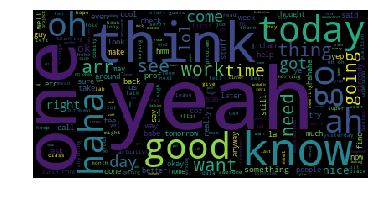

In [78]:
# for k,v in speaker_vocab.items():
#     print(k)
generate_wordcloud((' ').join(speaker_vocab['div']))